**CASE STUDY: YAKUB TRADING GROUP - ALGORITHMIC STAFF PROMOTION**

Abdullah’s Baba Yakub, 38, is the heir apparent to the highly revered Yakub business dynasty. The enterprise has spanned decades with vast investment interest in all the various sectors of the economy.

Abdullah has worked for 16 years in Europe and America after his first and second degrees at Harvard University where he studied Engineering and Business Management. He is a very experienced technocrat and a global business leader who rose through the rank to become a Senior Vice President at a leading US business conglomerate.
His dad is now 70 and has invited him to take over the company with a mandate to take it to the next level of growth as a sustainable legacy. Abdullah is trusted by his father and his siblings to lead this mandate.

On resumption, he had an open house with the staff to share his vision and to listen to them on how to take the business to the next level. Beyond the general operational issues and increasing need for regulatory compliance, one of the issues raised by the staff was a general concern on the process of staff promotion. Many of the staff allege that it is skewed and biased. Abdullah understood the concern and promised to address it in a most scientific way.

You have been called in by Abdullah to use your machine learning skills to study the pattern of promotion. With this insight, he can understand the important features among available features that can be used to predict promotion eligibility.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
promo = pd.read_csv("Yakub_train.csv")
promo.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [3]:
promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [4]:
# genderbi = promo[["Gender", "Promoted_or_Not"]]
gender = promo.groupby("Gender")["Promoted_or_Not"].sum().reset_index()
gender

,Gender,Promoted_or_Not
0,Female,1018
1,Male,2223


<AxesSubplot:xlabel='Gender', ylabel='Promoted_or_Not'>

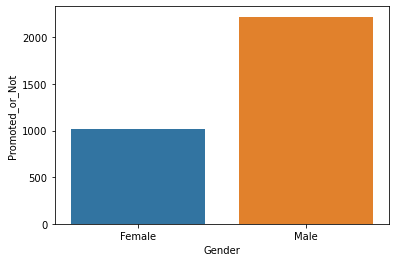

In [5]:
sns.barplot(x="Gender", y="Promoted_or_Not", data=gender)

In [6]:
channel = promo.groupby("Channel_of_Recruitment")["Promoted_or_Not"].sum().reset_index()

<AxesSubplot:xlabel='Channel_of_Recruitment', ylabel='Promoted_or_Not'>

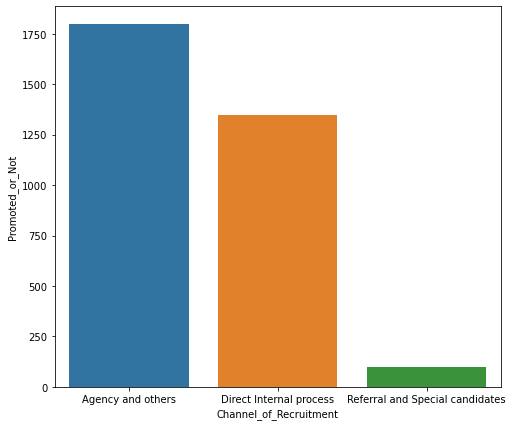

In [7]:
plt.figure(figsize=(8,7))
sns.barplot(x="Channel_of_Recruitment", y="Promoted_or_Not", data=channel)

In [8]:
target = promo.groupby("Targets_met")["Promoted_or_Not"].sum().reset_index()

<AxesSubplot:xlabel='Targets_met', ylabel='Promoted_or_Not'>

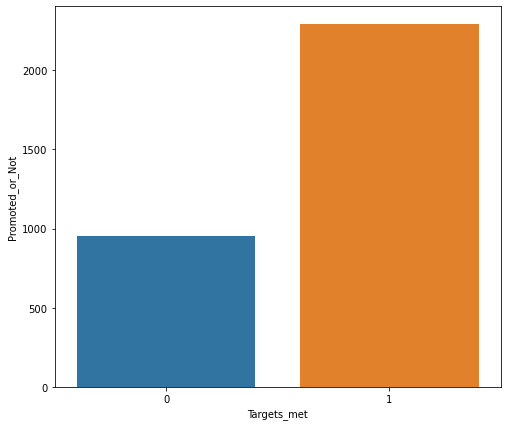

In [9]:
plt.figure(figsize=(8,7))
sns.barplot(x="Targets_met", y="Promoted_or_Not", data=target)

In [10]:
train = promo.groupby("Trainings_Attended")["Promoted_or_Not"].sum().reset_index()

<AxesSubplot:xlabel='Trainings_Attended', ylabel='Promoted_or_Not'>

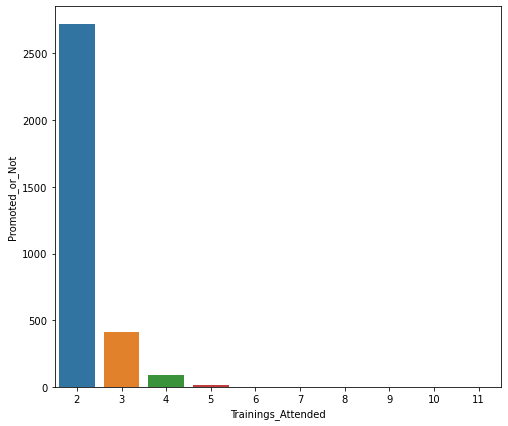

In [11]:
plt.figure(figsize=(8,7))
sns.barplot(x="Trainings_Attended", y="Promoted_or_Not", data=train)

<AxesSubplot:xlabel='Marital_Status', ylabel='Promoted_or_Not'>

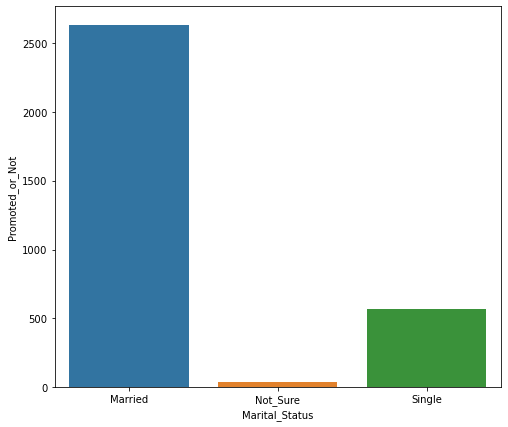

In [12]:
marital = promo.groupby("Marital_Status")["Promoted_or_Not"].sum().reset_index()
plt.figure(figsize=(8,7))
sns.barplot(x="Marital_Status", y="Promoted_or_Not", data=marital)

In [13]:
promoted = promo.value_counts("Promoted_or_Not")

promoted

Promoted_or_Not
0    35071
1     3241
dtype: int64

<AxesSubplot:xlabel='Promoted_or_Not', ylabel='count'>

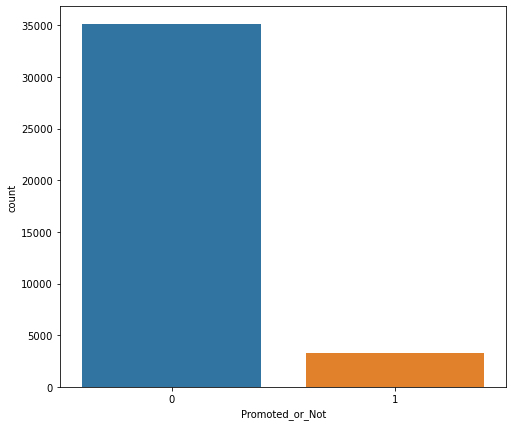

In [14]:
plt.figure(figsize=(8,7))
sns.countplot(x="Promoted_or_Not", data=promo)

<AxesSubplot:xlabel='Qualification', ylabel='count'>

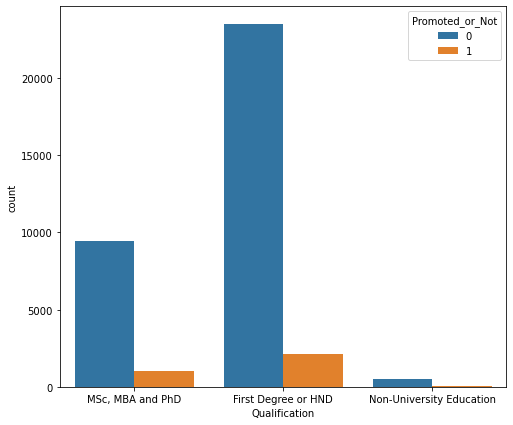

In [15]:
plt.figure(figsize=(8,7))
sns.countplot(x="Qualification",hue="Promoted_or_Not", data=promo)

In [16]:
promo.head(1)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0


<AxesSubplot:xlabel='Year_of_birth', ylabel='count'>

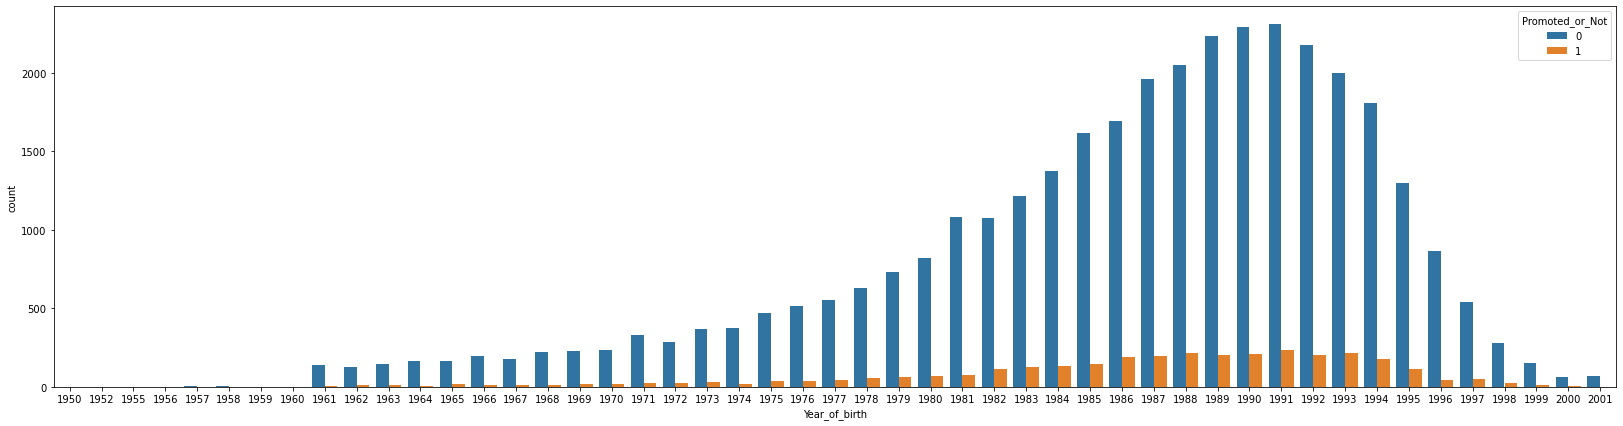

In [17]:
plt.figure(figsize=(28,7))
sns.countplot(x="Year_of_birth",hue="Promoted_or_Not", data=promo)

<AxesSubplot:xlabel='Year_of_birth', ylabel='count'>

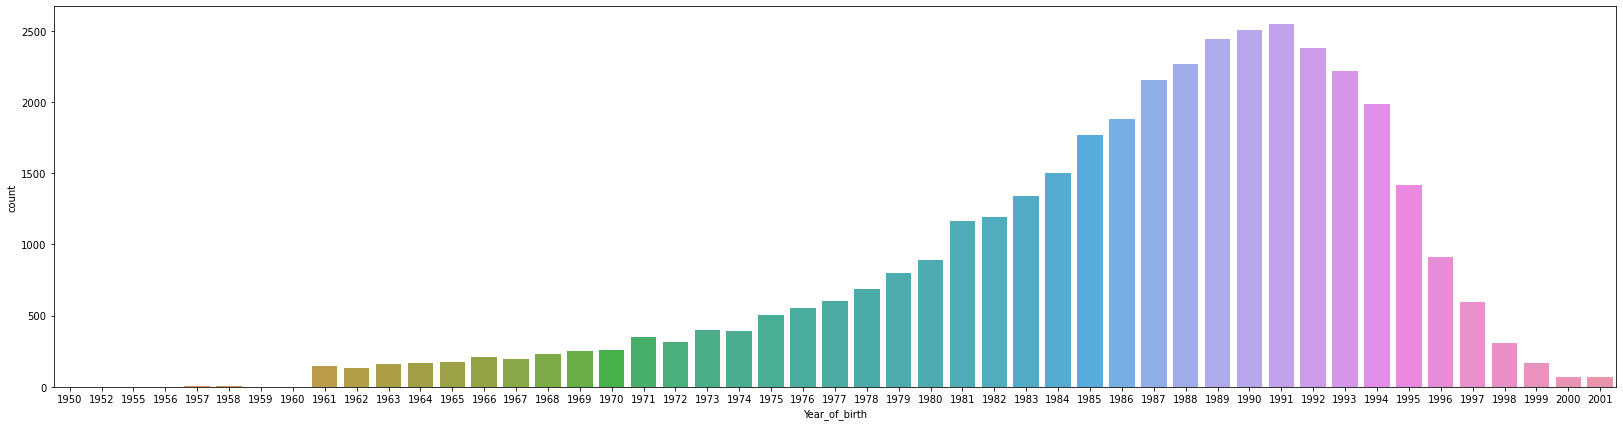

In [18]:
plt.figure(figsize=(28,7))
sns.countplot(x="Year_of_birth", data=promo)

<AxesSubplot:xlabel='Foreign_schooled', ylabel='count'>

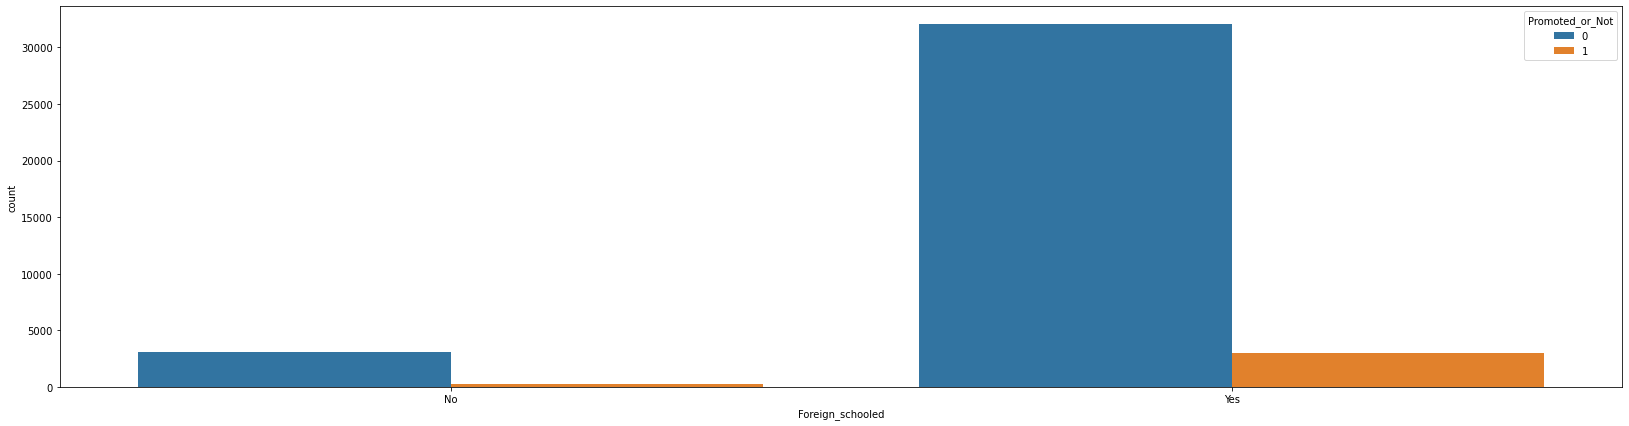

In [19]:
plt.figure(figsize=(28,7))
sns.countplot(x="Foreign_schooled",hue="Promoted_or_Not", data=promo)

<AxesSubplot:xlabel='Previous_Award', ylabel='count'>

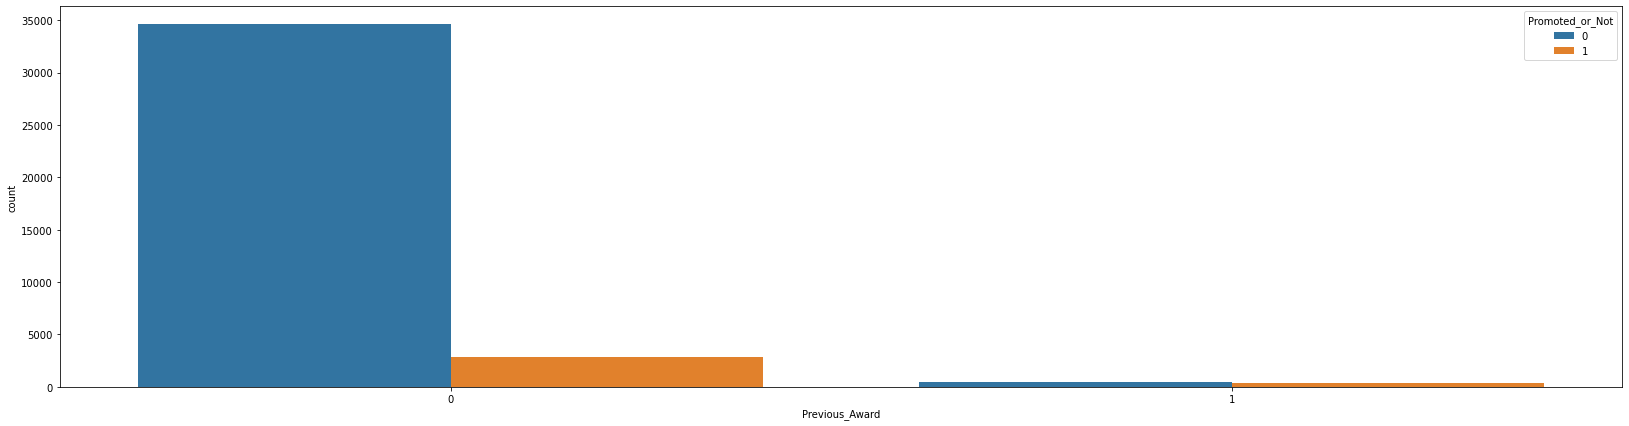

In [20]:
plt.figure(figsize=(28,7))
sns.countplot(x="Previous_Award",hue="Promoted_or_Not", data=promo)

<AxesSubplot:xlabel='Training_score_average', ylabel='count'>

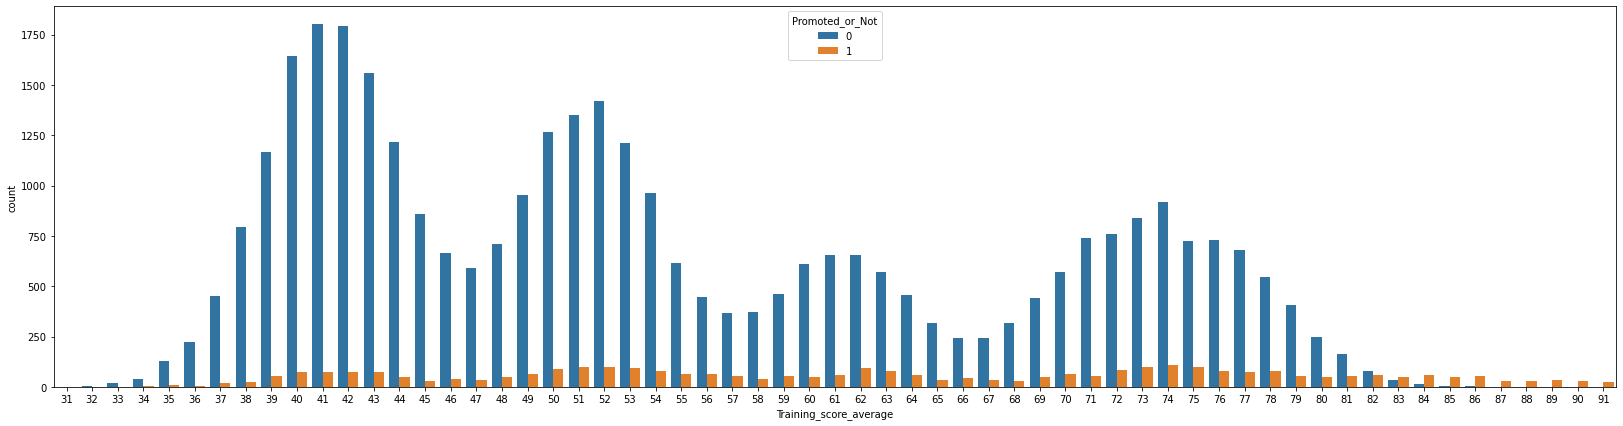

In [21]:
plt.figure(figsize=(28,7))
sns.countplot(x="Training_score_average",hue="Promoted_or_Not", data=promo)

<AxesSubplot:xlabel='State_Of_Origin', ylabel='count'>

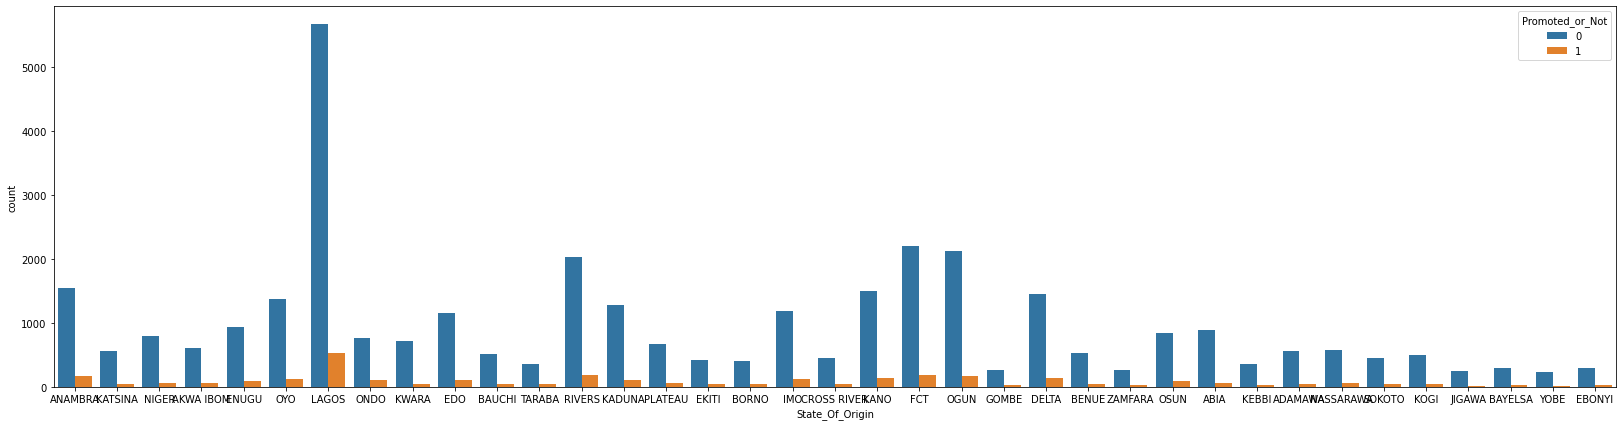

In [22]:
plt.figure(figsize=(28,7))
sns.countplot(x="State_Of_Origin",hue="Promoted_or_Not", data=promo)

<AxesSubplot:xlabel='No_of_previous_employers', ylabel='count'>

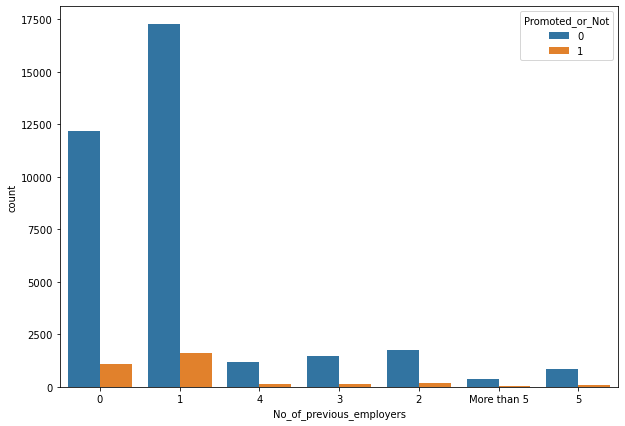

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x="No_of_previous_employers",hue="Promoted_or_Not", data=promo)

<AxesSubplot:xlabel='Past_Disciplinary_Action', ylabel='count'>

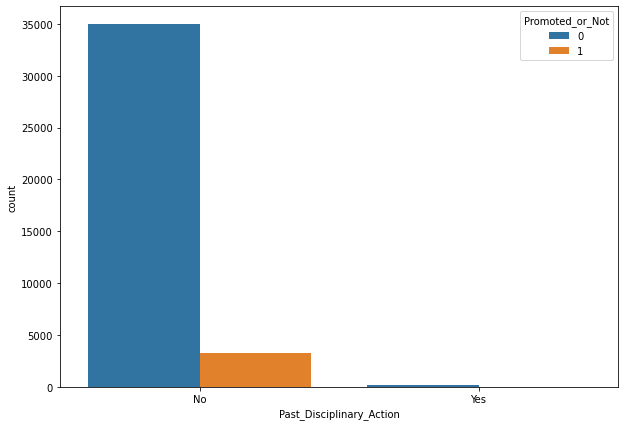

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(x="Past_Disciplinary_Action",hue="Promoted_or_Not", data=promo)

<AxesSubplot:xlabel='Year_of_recruitment', ylabel='count'>

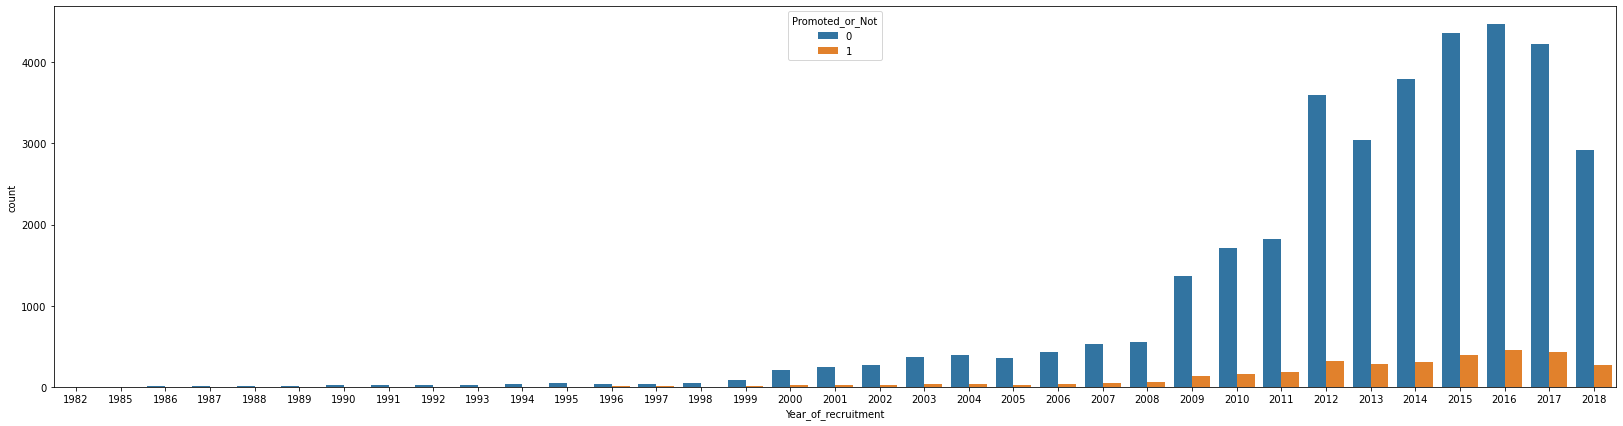

In [25]:
plt.figure(figsize=(28,7))
sns.countplot(x="Year_of_recruitment",hue="Promoted_or_Not", data=promo)

<AxesSubplot:xlabel='Division', ylabel='count'>

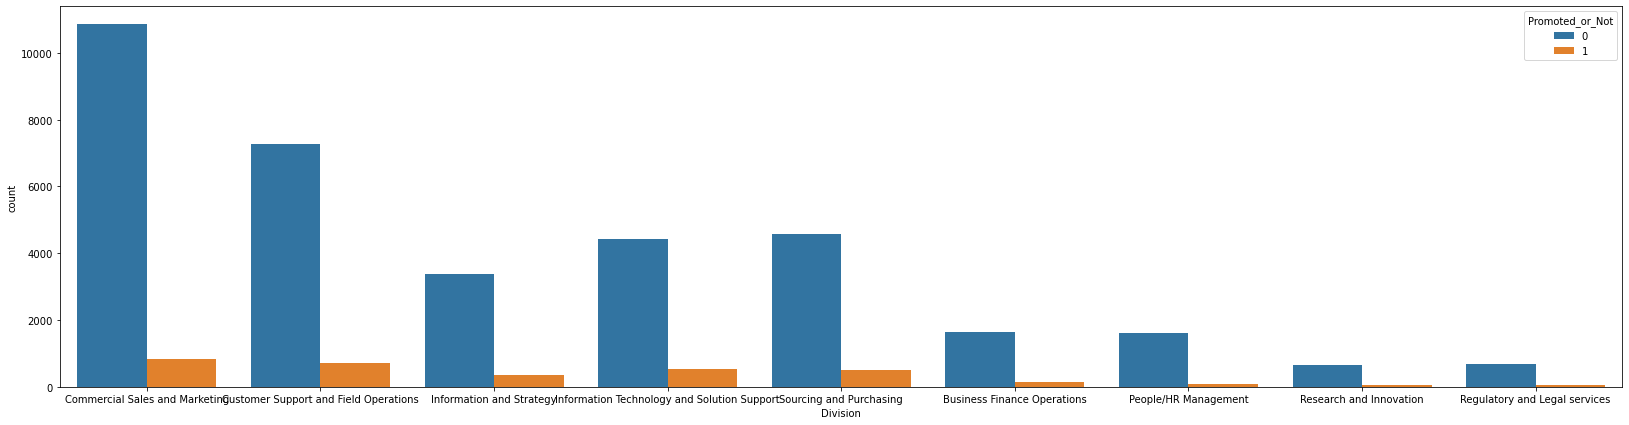

In [26]:
plt.figure(figsize=(28,7))
sns.countplot(x="Division",hue="Promoted_or_Not", data=promo)

In [27]:
promo.head(1)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0


In [28]:
# promo[promo["Gender"] == "Male"][["Gender","Promoted_or_Not"]]
# promo.groupby("Promoted_or_Not")[["Gender"]].sum()

In [29]:
# def gengroup (x):
#     if x == "Male":
#         return 0
#     else:
#         return 1


In [30]:
# promo['Gender_numerical'] = promo["Gender"].apply(gengroup)

In [31]:
# def group(col):
#     for i in col:
#         if i == "Male":
#             return 0
#         else:
#             return 1

In [32]:
# promo["newgen"] = promo["Gender"].apply(group)

In [33]:
promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [34]:
# promo.drop(["Gender_numerical", "newgen" ], axis = 1, inplace=True)

In [35]:
promo_new = pd.get_dummies(data=promo, columns=["Gender", "Past_Disciplinary_Action" , "Previous_IntraDepartmental_Movement", "Foreign_schooled"], drop_first=True )

In [36]:
# promo["Gender_Male"] = promo["Gender"]
# promo.rename(columns={"Gender_Male":"Gender"}, inplace=True)

In [37]:
promo_new.head()

,EmployeeNo,Division,Qualification,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Marital_Status,No_of_previous_employers,Promoted_or_Not,Gender_Male,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_Yes,Foreign_schooled_Yes
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,Married,0,0,0,0,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Married,0,0,1,0,0,1
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Married,0,0,1,0,0,1
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Single,1,0,1,0,0,1
4,YAK/S/00006,Information and Strategy,First Degree or HND,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Married,1,0,1,0,0,1


In [38]:
columns = {
            "Gender_Male":"Gender",
           "Past_Disciplinary_Action_Yes": "Past_Disciplinary_Action",
           "Previous_IntraDepartmental_Movement_Yes":"Previous_IntraDepartmental_Movement",
           "Foreign_schooled_Yes":"Foreign_schooled"
          }
'''Gender female = 0
Past_Disciplinary_Action , no = 0
Foreign_schooled , no = 0'''




promo_new.rename(columns=columns, inplace=True)

In [39]:
promo_new.head(1)

,EmployeeNo,Division,Qualification,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Marital_Status,No_of_previous_employers,Promoted_or_Not,Gender,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Foreign_schooled
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,Married,0,0,0,0,0,0


<AxesSubplot:>

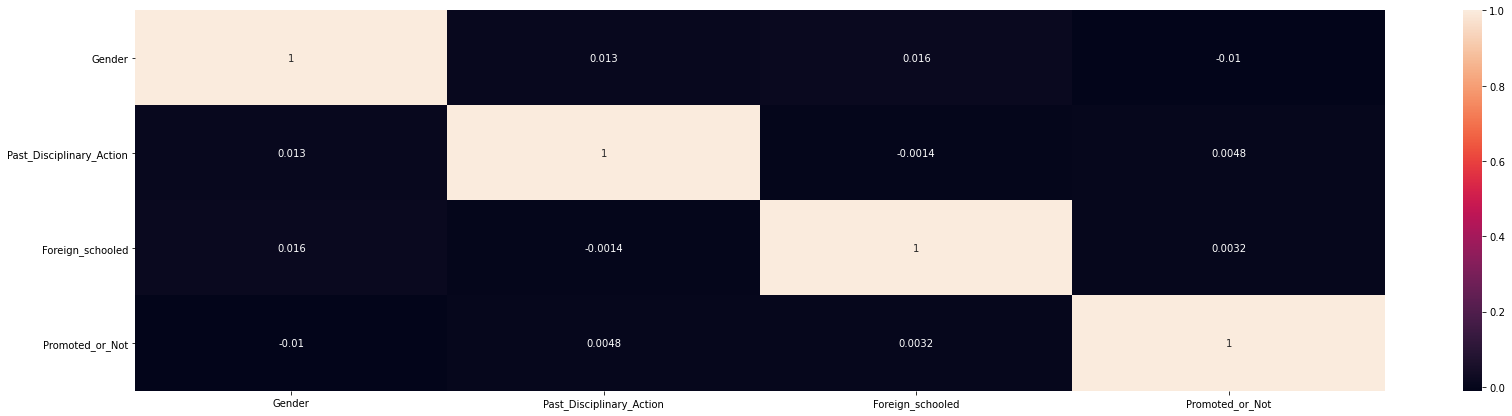

In [40]:
promo_corr = promo_new[["Gender", "Past_Disciplinary_Action", "Foreign_schooled", "Promoted_or_Not" ]]

plt.figure(figsize=(28,7))
sns.heatmap(promo_corr.corr(), annot=True)

In [41]:
promo.Qualification.sort_values()

38311    First Degree or HND
32491    First Degree or HND
19132    First Degree or HND
19131    First Degree or HND
19130    First Degree or HND
                ...         
38212                    NaN
38223                    NaN
38236                    NaN
38262                    NaN
38310                    NaN
Name: Qualification, Length: 38312, dtype: object

In [42]:
promo_new.fillna(method="bfill", inplace=True)

In [43]:
promo_new["Qualification"].unique()

array(['MSc, MBA and PhD', 'First Degree or HND',
       'Non-University Education'], dtype=object)

In [44]:
def enc(i):
    if i == "MSc, MBA and PhD":
        return 0
    elif i == "First Degree or HND":
        return 1
    elif i == "Non-University Education":
        return 2
       
    



In [45]:
promo_new["Qualification_new"] = promo_new["Qualification"].apply(enc)

In [46]:
promo_new.head()

,EmployeeNo,Division,Qualification,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Marital_Status,No_of_previous_employers,Promoted_or_Not,Gender,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Foreign_schooled,Qualification_new
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,Married,0,0,0,0,0,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Married,0,0,1,0,0,1,1
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Married,0,0,1,0,0,1,1
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Single,1,0,1,0,0,1,1
4,YAK/S/00006,Information and Strategy,First Degree or HND,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Married,1,0,1,0,0,1,1


In [47]:
promo_new["Division"].unique()

array(['Commercial Sales and Marketing',
       'Customer Support and Field Operations',
       'Information and Strategy',
       'Information Technology and Solution Support',
       'Sourcing and Purchasing', 'Business Finance Operations',
       'People/HR Management', 'Research and Innovation',
       'Regulatory and Legal services'], dtype=object)

In [48]:
def enc(i):
    if i == "Commercial Sales and Marketing":
        return 0
    elif i == "Customer Support and Field Operations":
        return 1
    elif i == "Information and Strategy":
        return 2
    elif i == "Information Technology and Solution Support":
        return 3
    elif i == "Sourcing and Purchasing":
        return 4
    elif i == "People/HR Management":
        return 5
    elif i == "Regulatory and Legal services":
        return 6
    elif i == "Business Finance Operations":
        return 7
    elif i == "Research and Innovation":
        return 7

    

In [49]:
promo_new["Division_new"] = promo_new["Division"].apply(enc)

In [50]:
# promo_new.info()
promo_new.head()

,EmployeeNo,Division,Qualification,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,...,State_Of_Origin,Marital_Status,No_of_previous_employers,Promoted_or_Not,Gender,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Foreign_schooled,Qualification_new,Division_new
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Direct Internal process,2,1986,12.5,2011,1,0,...,ANAMBRA,Married,0,0,0,0,0,0,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Agency and others,2,1991,12.5,2015,0,0,...,ANAMBRA,Married,0,0,1,0,0,1,1,1
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Direct Internal process,2,1987,7.5,2012,0,0,...,KATSINA,Married,0,0,1,0,0,1,1,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Agency and others,3,1982,2.5,2009,0,0,...,NIGER,Single,1,0,1,0,0,1,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Direct Internal process,3,1990,7.5,2012,0,0,...,AKWA IBOM,Married,1,0,1,0,0,1,1,2


In [51]:
promo_new["Channel_of_Recruitment"].unique()

array(['Direct Internal process', 'Agency and others',
       'Referral and Special candidates'], dtype=object)

In [52]:
def enc(i):
    if i == "Direct Internal process":
        return 0
    elif i == "Agency and others":
        return 1
    elif i == "Information and Strategy":
        return 2
    elif i == "Referral and Special candidates":
        return 3

In [53]:
promo_new["Channel_of_Recruitment_New"] = promo_new["Channel_of_Recruitment"].apply(enc)

In [54]:
promo_new.head()

,EmployeeNo,Division,Qualification,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,...,Marital_Status,No_of_previous_employers,Promoted_or_Not,Gender,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Foreign_schooled,Qualification_new,Division_new,Channel_of_Recruitment_New
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Direct Internal process,2,1986,12.5,2011,1,0,...,Married,0,0,0,0,0,0,0,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Agency and others,2,1991,12.5,2015,0,0,...,Married,0,0,1,0,0,1,1,1,1
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Direct Internal process,2,1987,7.5,2012,0,0,...,Married,0,0,1,0,0,1,1,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Agency and others,3,1982,2.5,2009,0,0,...,Single,1,0,1,0,0,1,1,0,1
4,YAK/S/00006,Information and Strategy,First Degree or HND,Direct Internal process,3,1990,7.5,2012,0,0,...,Married,1,0,1,0,0,1,1,2,0


In [55]:
promo_new["Marital_Status"].unique()

array(['Married', 'Single', 'Not_Sure'], dtype=object)

In [56]:
# def enc(i):
#     if i == "Married":
#         return 0
#     elif i == "Single":
#         return 1
#     elif i == "Not_Sure":
#         return 2


In [57]:
# promo_new["Marital_Status_New"] = ["Marital_Status"].apply(enc)

In [61]:
value = {"Married": 0, "Single":1, "Not_Sure":2}
promo_new["Marital_Status"].replace(value, inplace=True)

In [62]:
promo_new["Marital_Status"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:>

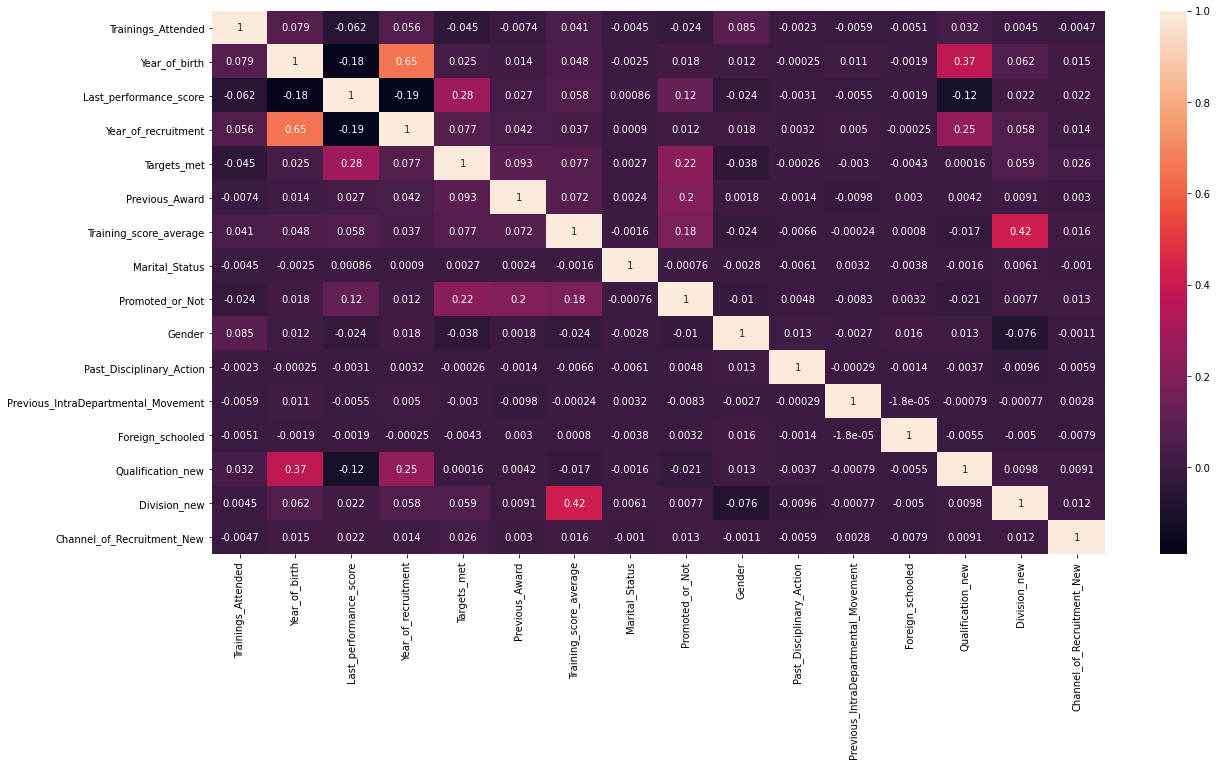

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(promo_new.corr(), annot=True)

### FEATURE SELECTION

In [67]:
promo_new.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Channel_of_Recruitment',
       'Trainings_Attended', 'Year_of_birth', 'Last_performance_score',
       'Year_of_recruitment', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'State_Of_Origin', 'Marital_Status',
       'No_of_previous_employers', 'Promoted_or_Not', 'Gender',
       'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement',
       'Foreign_schooled', 'Qualification_new', 'Division_new',
       'Channel_of_Recruitment_New'],
      dtype='object')

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [70]:
X = promo_new[['Last_performance_score', "Targets_met", "Previous_Award", "Training_score_average"]]
y = promo_new['Promoted_or_Not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [74]:
X_train.head(3)

,Last_performance_score,Targets_met,Previous_Award,Training_score_average
24636,10.0,0,0,54
9703,12.5,0,0,46
34141,0.0,1,0,76


In [71]:
print('X train rows:', X_train.shape)
print('y train rows:', y_train.shape)

X train rows: (30649, 4)
y train rows: (30649,)


In [72]:
print('X test rows:', X_test.shape)
print('y test rows:', y_test.shape)

X test rows: (7663, 4)
y test rows: (7663,)


In [76]:
# Model selection
model = LogisticRegression(random_state=10)

In [77]:
# Model Training
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [78]:
y_pred = model.predict(X_test)

In [79]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95      6991
           1       0.49      0.05      0.09       672

    accuracy                           0.91      7663
   macro avg       0.70      0.52      0.52      7663
weighted avg       0.88      0.91      0.88      7663



In [83]:
f1_score(y_test, y_pred)

0.08683853459972862